# Measure the standard of regression algorithms

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Boston Property Data

In [2]:
boston = datasets.load_boston()

In [3]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
x = boston.data[:,5]

In [6]:
x.shape

(506,)

In [7]:
y = boston.target

In [8]:
y.shape

(506,)

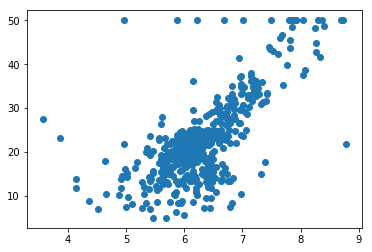

In [9]:
plt.scatter(x, y)

In [10]:
np.max(y)

50.0

In [11]:
x = x[y < 50.0]
y = y[y < 50.0]

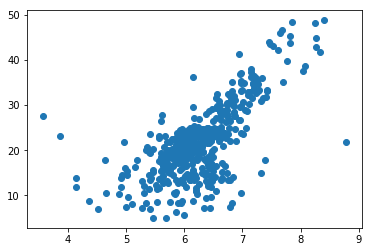

In [12]:
plt.scatter(x, y)

# Using Simple Linear Regression

In [13]:
from playML.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, seed=666)

In [14]:
x_train.shape

(392,)

In [15]:
x_test.shape

(98,)

In [16]:
from playML.SimpleLinearRegression import SimpleLinearRegression2

In [17]:
reg = SimpleLinearRegression2()
reg.fit(x_train, y_train)

SimpleLinearRegression2()

In [18]:
reg.a_

7.8608543562689555

In [19]:
reg.b_

-27.459342806705543

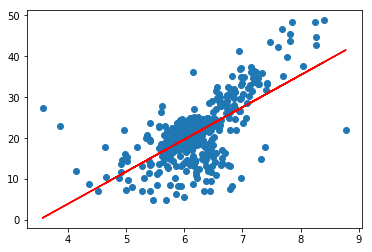

In [20]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color='r')

In [21]:
x_train

array([6.343, 5.362, 7.267, 5.701, 7.765, 6.54 , 6.301, 5.813, 6.781,
       6.114, 5.713, 6.842, 6.242, 5.412, 4.652, 5.67 , 7.148, 6.649,
       5.757, 6.037, 6.563, 6.223, 6.726, 6.701, 5.304, 6.606, 7.178,
       6.211, 6.004, 7.287, 6.998, 7.147, 6.23 , 5.783, 5.399, 6.957,
       8.398, 5.79 , 6.211, 6.163, 5.706, 5.683, 6.951, 6.086, 6.77 ,
       5.878, 5.837, 6.951, 5.56 , 6.081, 6.474, 5.895, 6.302, 6.176,
       6.879, 6.312, 6.021, 7.014, 6.172, 5.926, 5.663, 7.088, 6.495,
       5.036, 6.113, 6.335, 5.884, 6.406, 6.279, 5.834, 6.29 , 3.561,
       7.61 , 5.966, 6.567, 5.757, 5.896, 7.236, 5.637, 6.122, 5.57 ,
       5.427, 5.708, 6.254, 5.951, 6.326, 5.856, 5.631, 5.983, 5.914,
       6.066, 5.836, 7.203, 6.108, 6.02 , 6.101, 5.87 , 6.794, 6.454,
       6.316, 6.897, 6.059, 6.286, 6.152, 6.162, 5.   , 6.481, 5.787,
       6.421, 5.88 , 5.889, 4.368, 6.03 , 7.691, 6.516, 8.04 , 5.604,
       6.549, 6.482, 4.963, 6.655, 5.012, 6.395, 6.096, 6.426, 5.891,
       6.108, 6.051,

In [22]:
y_predict = reg.predict(x_test)

## MSE

## Mean Squared Error

<img src="http://chart.googleapis.com/chart?cht=tx&chl= \frac{1}{m}\sum_{i=1}^{m} \left (y_{test}^{(i)}-\hat{y}_{test}^{(i)})\right )^2 " style="border:none;">

In [23]:
mse_test = np.sum((y_predict - y_test) ** 2) / len(y_test) 
mse_test

24.156602134387438

## RMSE

## Root Mean Squared Error

<img src="http://chart.googleapis.com/chart?cht=tx&chl= \sqrt{\frac{1}{m}\sum_{i=1}^{m} \left (y_{test}^{(i)}-\hat{y}_{test}^{(i)})\right )^2} " style="border:none;">

In [24]:
from math import sqrt

rmse_test = sqrt(mse_test)
rmse_test

4.914936635846635

## MAE

## Mean Absolute Error

<img src="http://chart.googleapis.com/chart?cht=tx&chl= \frac{1}{m}\sum_{i=1}^{m} \left | y_{test}^{(i)}-\hat{y}_{test}^{(i)} \right |" style="border:none;">

In [25]:
mae_test = np.sum(np.absolute(y_predict - y_test)) / len(y_test)
mae_test

3.5430974409463873

# MSE and MAE in scikit-learn

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [27]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [28]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

# R Squared

<img src="http://chart.googleapis.com/chart?cht=tx&chl= R^2=1-SS_{residual}/SS_{total} " style="border:none;">

<img src="http://chart.googleapis.com/chart?cht=tx&chl= R^2=1-\sum_{i}^{ }(\hat{y}^{(i)}-y^{(i)})^2/\sum_{i}^{ }(\bar{y}-y^{(i)})^2 " style="border:none;">

ss_residual(Residual Sum of Squares)

ss_total(Total Sum of Squares)

In [29]:
1 - mean_squared_error(y_test, y_predict)/np.var(y_test)

0.6129316803937322

In [30]:
from playML.metrics import r2_score

In [31]:
r2_score(y_test, y_predict)

0.6129316803937322

In [32]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

0.6129316803937324